In [12]:
import numpy as np
import pandas as pd
from itertools import permutations
import csv
import numpy as np
 
start_value1= 2e-05
end_value1 = 6e-05


# Define the step size for the range
array = np.linspace(start_value1, end_value1, 30)

csv_file = 'combinations.csv'
 
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['particle_diameter_1'])
    writer.writerows(zip(array))

print(array)


[2.00000000e-05 2.13793103e-05 2.27586207e-05 2.41379310e-05
 2.55172414e-05 2.68965517e-05 2.82758621e-05 2.96551724e-05
 3.10344828e-05 3.24137931e-05 3.37931034e-05 3.51724138e-05
 3.65517241e-05 3.79310345e-05 3.93103448e-05 4.06896552e-05
 4.20689655e-05 4.34482759e-05 4.48275862e-05 4.62068966e-05
 4.75862069e-05 4.89655172e-05 5.03448276e-05 5.17241379e-05
 5.31034483e-05 5.44827586e-05 5.58620690e-05 5.72413793e-05
 5.86206897e-05 6.00000000e-05]


In [13]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

path = 'stochastic_tools_out.json'
data20 = pd.read_csv('TT1.csv')

# to open the JSON file in read mode, assign it to the variable file and convert into a pyhton data structure (dictionary)
with open(path, 'r') as file: 
  data_json = json.load(file)


# to extract the samples dictionary from data_json and convert it into a DataFrame
data_label = data_json['time_steps'][-1]['samples'] 
parameters_study = pd.DataFrame(data_label)
parameters_study.columns = ['particle_diameter_1']


raw_data = data_json['time_steps'][-1]['results']
df = pd.DataFrame(raw_data)
df.columns = ['inlet-p', 'outlet-p','time','converged']
df

p_in = df['inlet-p'][:].tolist()
t = df['time'][:].tolist()

# # The first element of the list t is selected and ordered vertically
t_header = np.stack(t[0],axis=0)
# A DataFrame is created, composed by all the inlet pressure values at each time-step 
md_df = pd.DataFrame(data = p_in, columns=t_header)
md_df = md_df.T
print('Modeling Results')
md_df *= 1e-6
md_df


Modeling Results


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0.0,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,...,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554
0.1,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,...,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554,5.720554
0.2,5.720554,5.720554,5.720554,5.720555,5.720550,5.720519,5.720427,5.720226,5.719868,5.719309,...,5.696349,5.692969,5.689452,5.685819,5.682086,5.678271,5.674391,5.670459,5.666490,5.662495
0.3,5.720555,5.720554,5.720555,5.720554,5.720497,5.720256,5.719650,5.718493,5.716631,5.713954,...,5.634902,5.624894,5.614716,5.604423,5.594064,5.583683,5.573318,5.563003,5.552770,5.542643
0.4,5.720555,5.720553,5.720559,5.720532,5.720243,5.719286,5.717211,5.713647,5.708356,5.701236,...,5.537438,5.519081,5.500726,5.482457,5.464348,5.446462,5.428852,5.411561,5.394625,5.378072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49.6,4.129983,3.329200,2.598459,1.982151,1.494856,1.128291,0.861539,0.670476,0.533694,0.434730,...,0.131617,0.125738,0.120947,0.117045,0.113861,0.111272,0.109176,0.107488,0.106134,0.105056
49.7,4.127654,3.326272,2.595274,1.979045,1.492069,1.125935,0.859621,0.668943,0.532471,0.433749,...,0.131460,0.125603,0.120833,0.116948,0.113778,0.111202,0.109118,0.107439,0.106094,0.105023
49.8,4.125327,3.323346,2.592094,1.975945,1.489289,1.123586,0.857709,0.667415,0.531254,0.432772,...,0.131305,0.125470,0.120719,0.116851,0.113696,0.111133,0.109059,0.107390,0.106054,0.104990
49.9,4.123002,3.320424,2.588919,1.972853,1.486516,1.121244,0.855805,0.665894,0.530041,0.431799,...,0.131149,0.125337,0.120607,0.116755,0.113615,0.111064,0.109002,0.107342,0.106014,0.104957


(0.0, 5.0)

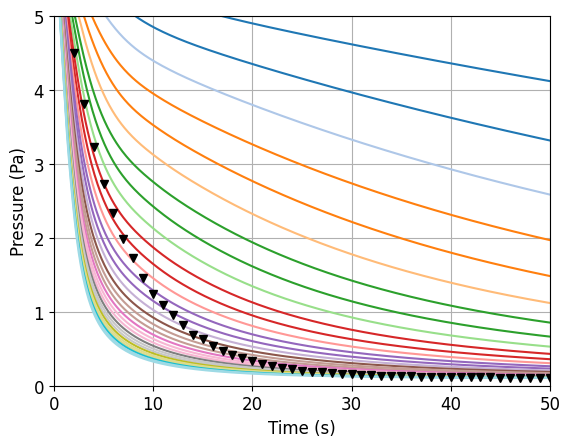

In [14]:
# Plot all pressure decays
ax = md_df.plot(colormap='tab20', legend=False)
plt.plot(data20['time'], data20['TT1_1000_2']/1e6, color = 'k', marker = 'v', linestyle = '')
ax.tick_params(axis='both', labelsize=12)  
plt.xlabel('Time (s)', fontsize = 12)
plt.ylabel('Pressure (Pa)', fontsize = 12)
plt.grid()
plt.xlim(0, 50)
plt.ylim(0, 5)

[73.23442925 62.90628282 52.8070572  43.47759589 35.20915901 28.10239443
 22.13019243 17.20074743 13.20917265 10.07561066  7.77277144  6.32853446
  5.74785014  5.87457055  6.42414106  7.15649826  7.93552921  8.69724752
  9.41485057 10.07911211 10.68885526 11.24647167 11.75578928 12.22107966
 12.6465613  13.03618519 13.39356032 13.72195064 14.02425483 14.30305667]


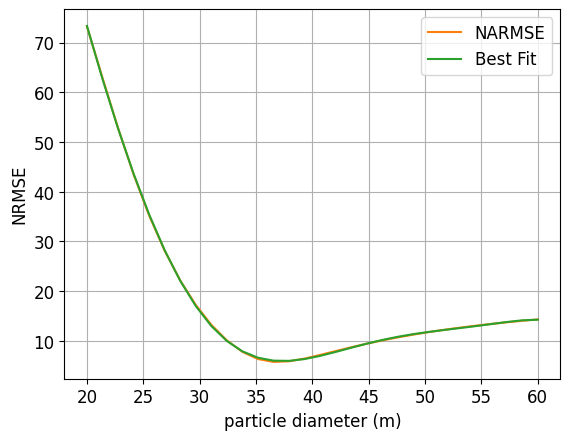

In [15]:


# Function to compute Absolute Root Mean Square Error (ARMSE) 
def compute_armse(y_values, experimental_y_values):
    absolute_error = np.abs(y_values - experimental_y_values)
    squared_error = absolute_error**2
    mean_squared_error = np.mean(squared_error)
    armse = np.sqrt(mean_squared_error)
    return armse

NARMSE = []

for i in range(md_df.shape[1]):
    pressure = md_df.iloc[:, i]  # Select column using numerical index
    y_values = pressure.values
    x_values = np.linspace(0, 50, 501)
    experimental_y_values = np.interp(x_values, data20['time'], data20['TT1_1000_2']/1e6)
    range_of_observed_values = np.max(experimental_y_values) - np.min(experimental_y_values)
    armse = compute_armse(y_values, experimental_y_values)
    narmse = compute_armse(y_values, experimental_y_values)/range_of_observed_values*100
    # Append the value to the NumPy array
    NARMSE = np.append(NARMSE, narmse) 

print(NARMSE)


particle_diameter_1 = pd.read_csv('combinations.csv')*1e6

degree = 8 # Degree of the polynomial
coefficients = np.polyfit(particle_diameter_1['particle_diameter_1'], NARMSE, degree)
poly_function = np.poly1d(coefficients)
y_fit = poly_function(particle_diameter_1['particle_diameter_1'])

plt.plot(particle_diameter_1['particle_diameter_1'], NARMSE, color='C1', label = 'NARMSE')
plt.plot(particle_diameter_1['particle_diameter_1'], y_fit, color='C2', label = 'Best Fit')
plt.xlabel('particle diameter (m)', fontsize = 12)
plt.ylabel('NRMSE', fontsize = 12)
plt.tick_params(axis='both', which='major', labelsize=12) 
plt.legend(fontsize = 12)
plt.grid()

parameters = pd.read_csv('combinations.csv')


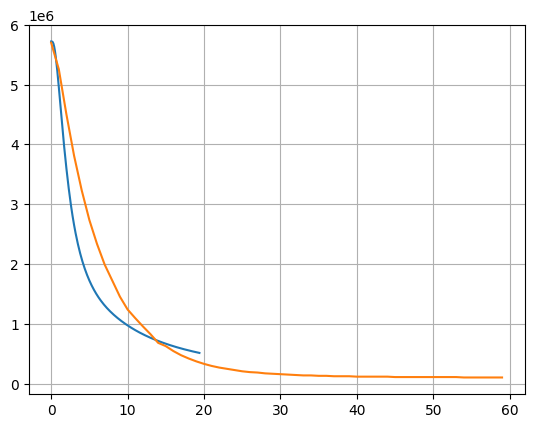

In [16]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

data20 = pd.read_csv('TT1.csv')
Forchheimer = pd.read_csv('model_pellets_out.csv')
plt.plot(Forchheimer['time'], Forchheimer['inlet-p'])
plt.plot(data20['time'], data20['TT1_1000_2'])
plt.grid()